In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math
from sklearn.linear_model import LinearRegression

In [2]:
sigma = 2.5

a1 = 5
a2 = 3

a = np.array([a1, a2])

n = 100

X = np.random.uniform(-6, 6, (n, 2))

eps = np.random.exponential(sigma, 100) - 1/sigma

eps_ = np.stack((eps, eps)).T

Xeps = ((np.stack((X[:, 0]**2, X[:, 1])).T)*eps_).sum(1)

Y = X @ a + Xeps

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


In [4]:
X = pd.DataFrame(X)
y = pd.DataFrame(Y)

# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

In [5]:
dataframe

,0,1,0
0,-4.466153,-1.350162,51.167462
1,2.545212,1.875895,127.584120
2,2.699409,4.247510,56.651751
3,5.975854,-3.373380,7.630276
4,5.900004,-1.329869,166.486287
...,...,...,...
95,-5.882992,-5.752796,-19.521666
96,2.192974,2.231838,29.811358
97,-1.340568,-2.419368,-14.229569
98,1.836503,2.559057,17.472039


c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


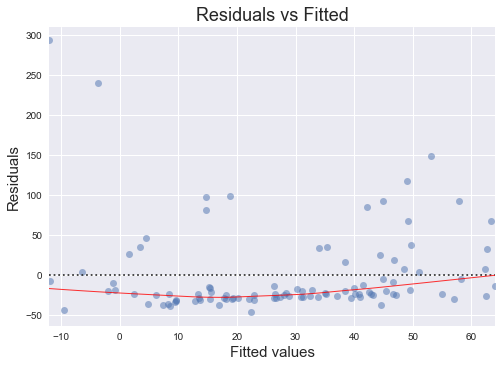

In [6]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');


c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


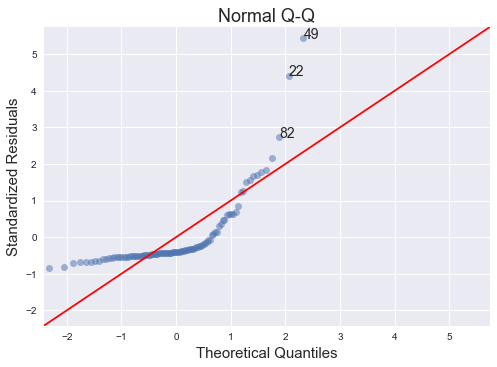

In [7]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));


c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


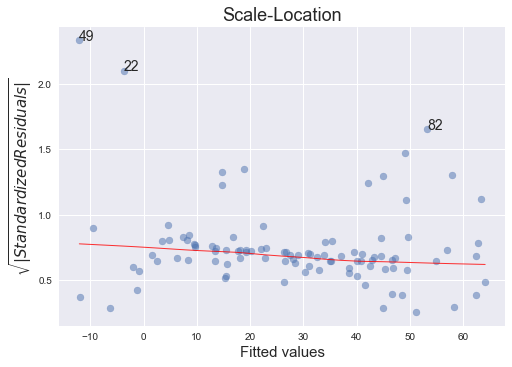

In [8]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));

In [9]:
ri = model_fitted_y.values - y[0].values
stats.jarque_bera(ri)

Jarque_beraResult(statistic=586.1706665892539, pvalue=0.0)

In [10]:
stats.shapiro(ri)

ShapiroResult(statistic=0.631746768951416, pvalue=1.797970409708749e-14)

In [11]:
import statsmodels.stats

In [12]:
statsmodels.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=12)

(7.651870843032982, 0.8117096841120155, 0.5869177026065185, 0.8470920348990685)

In [13]:
statsmodels.stats.diagnostic.het_breuschpagan(model_fit.resid, model_fit.model.exog)

(4.660694282416178,
 0.09726197758807804,
 2.370938942714518,
 0.09878506071972763)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
from scipy.optimize import curve_fit
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

<h1>SECOND TASK</h1>

In [15]:
X = np.random.chisquare(3, 100)

eps = np.random.normal(0, 1, 100)

Y = X*2**eps

In [16]:
#X = np.log(pd.DataFrame(X_))
#y = np.log(pd.DataFrame(y_))

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

In [17]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


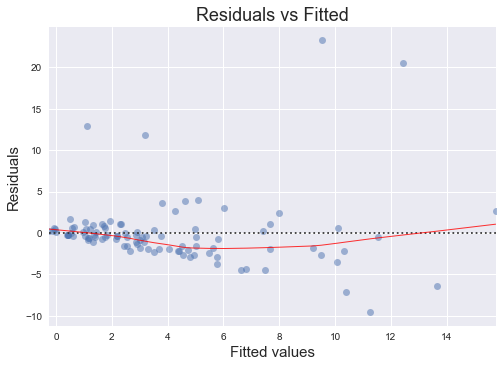

In [18]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


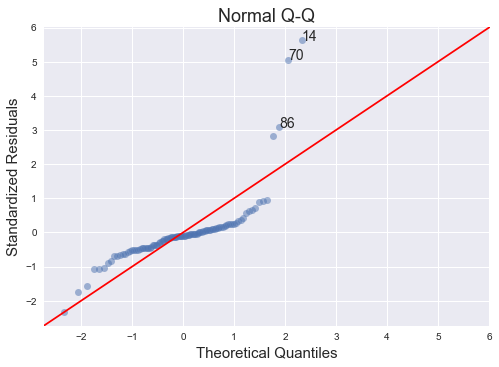

In [19]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


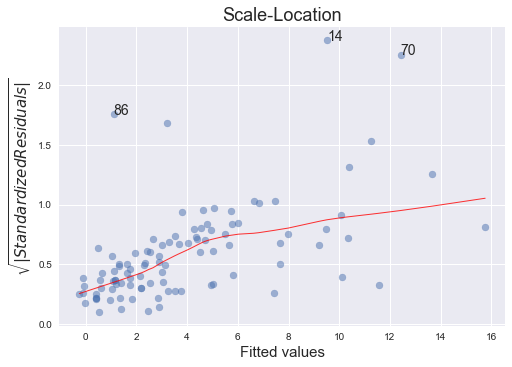

In [20]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));

<h2>NORM</h2>

In [21]:
stats.jarque_bera(model_residuals)

Jarque_beraResult(statistic=1053.3607730044014, pvalue=0.0)

In [22]:
import statsmodels.stats

<h2>NO CORRELATION</h2>

In [23]:
statsmodels.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=12)

(11.48663269469521, 0.4877373273711759, 0.9300388195759207, 0.5212662054965886)

<h2>HOMO</h2>

In [24]:
statsmodels.stats.diagnostic.het_breuschpagan(model_fit.resid, model_fit.model.exog)

(10.978002675418953,
 0.0009219974553113818,
 12.085150800070757,
 0.0007590990404276276)

<h1>WITH BOXCOX</h1>

In [25]:
X_ = np.random.chisquare(3, 100)

eps = np.random.normal(0, 1, 100)

Y_ = X_*2**eps

In [26]:
def get_fitted(x, y):
    X = pd.DataFrame(x)
    Y = pd.DataFrame(y)

    # generate OLS model
    model = sm.OLS(Y, sm.add_constant(X))
    model_fit = model.fit()
    
    model_fitted_y = model_fit.fittedvalues
    
    return model_fitted_y

In [27]:
def func(lmbds):
    x = stats.boxcox(X_, lmbds[0])
    y = ((Y_.prod()**(1/len(Y_)))**(1-lmbds[1]))*stats.boxcox(Y_, lmbds[1])
    fitted = get_fitted(x, y)
    
    return ((fitted - y)**2).sum()

In [28]:
import scipy

In [29]:
lmbds = scipy.optimize.minimize(func, [0.2, 0.2])

In [32]:
x = stats.boxcox(X_, lmbds['x'][0])
y = ((Y_.prod()**(1/len(Y_)))**(1-lmbds['x'][1]))*stats.boxcox(Y_, lmbds['x'][1])

In [33]:
#X = np.log(pd.DataFrame(X_))
#y = np.log(pd.DataFrame(y_))

X = pd.DataFrame(x)
Y = pd.DataFrame(y)

# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

In [34]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


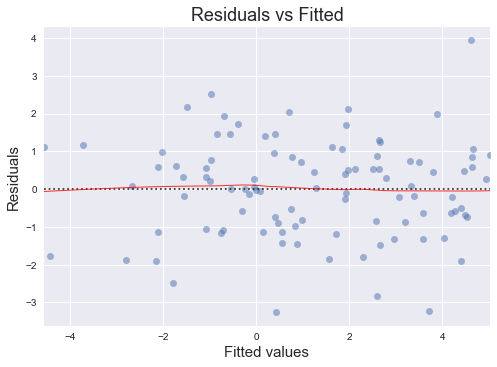

In [35]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


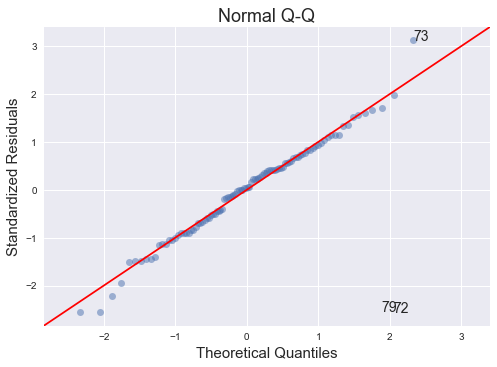

In [36]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


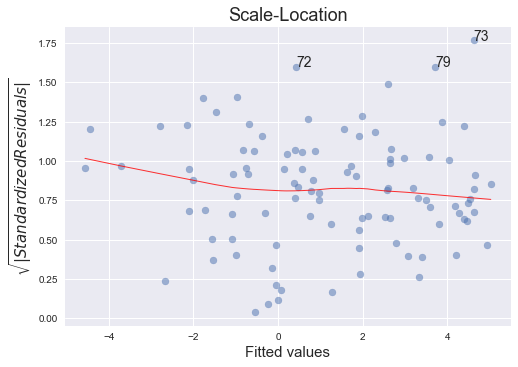

In [37]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));

<h2>NORM</h2>

In [38]:
stats.jarque_bera(model_residuals)

Jarque_beraResult(statistic=0.45796838555376107, pvalue=0.7953411055400406)

In [39]:
import statsmodels.stats

<h2>NO CORRELATION</h2>

In [40]:
statsmodels.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=12)

(15.10188807958337,
 0.2359117213016053,
 1.2748245568185974,
 0.24824878012661528)

<h2>HOMO</h2>

In [41]:
statsmodels.stats.diagnostic.het_breuschpagan(model_fit.resid, model_fit.model.exog)

(0.012870223803596037,
 0.9096761726149862,
 0.012614442834553135,
 0.9108041474052017)

(<matplotlib.collections.PathCollection at 0x29f42d2ae80>,
 <matplotlib.collections.PathCollection at 0x29f42d34d00>)

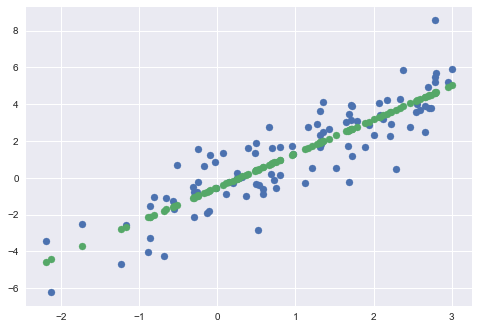

In [42]:
plt.scatter(x, y), plt.scatter(x, model_fitted_y)

<h1>JUST LOG</h1>

In [43]:
X = np.random.chisquare(3, 100)

eps = np.random.normal(0, 1, 100)

Y = X*2**eps

In [44]:
x = np.log(X)
y = np.log(Y)

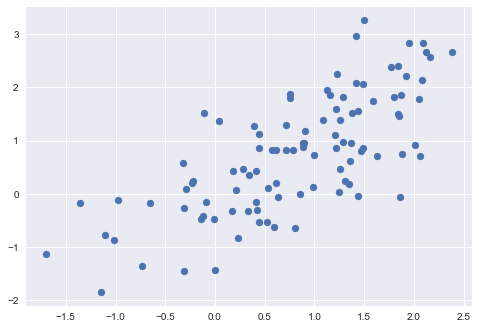

In [45]:
plt.scatter(x, y)

In [46]:
#X = np.log(pd.DataFrame(X_))
#y = np.log(pd.DataFrame(y_))

X = pd.DataFrame(x)
Y = pd.DataFrame(y)

# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

In [47]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


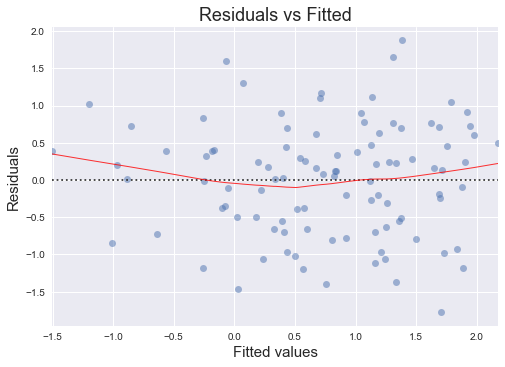

In [48]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


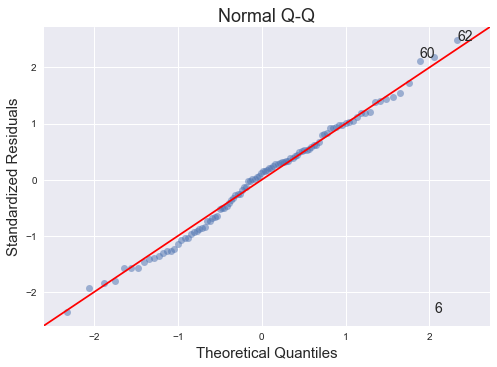

In [49]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


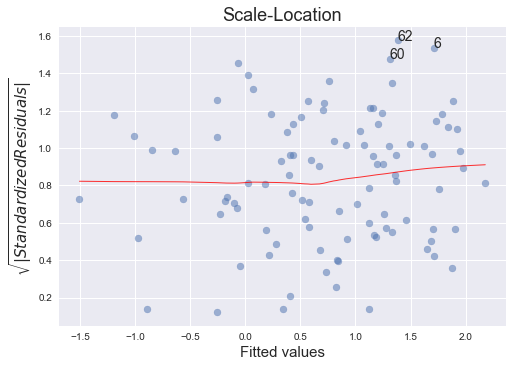

In [50]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));

In [51]:
X = np.random.chisquare(3, 100)

eps = np.random.normal(0, 1, 100)

Y = (3 + np.log(X) + eps)**2

In [52]:
def get_fitted(x, y):
    X = pd.DataFrame(x)
    Y = pd.DataFrame(y)

    # generate OLS model
    model = sm.OLS(Y, sm.add_constant(X))
    model_fit = model.fit()
    
    model_fitted_y = model_fit.fittedvalues
    
    return model_fitted_y

In [53]:
def func(lmbds):
    x = stats.boxcox(X_, lmbds[0])
    y = ((Y_.prod()**(1/len(Y_)))**(1-lmbds[1]))*stats.boxcox(Y_, lmbds[1])
    fitted = get_fitted(x, y)
    
    return ((fitted - y)**2).sum()

In [54]:
import scipy

In [55]:
lmbds = scipy.optimize.minimize(func, [0.2, 0.1])

In [56]:
x = stats.boxcox(X_, lmbds['x'][0])
y = ((Y_.prod()**(1/len(Y_)))**(1-lmbds['x'][1]))*stats.boxcox(Y_, lmbds['x'][1])

In [57]:
#X = np.log(pd.DataFrame(X_))
#y = np.log(pd.DataFrame(y_))

X = pd.DataFrame(x)
Y = pd.DataFrame(y)

# generate OLS model
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, Y for easier plot handling
dataframe = pd.concat([X, Y], axis=1)

In [58]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


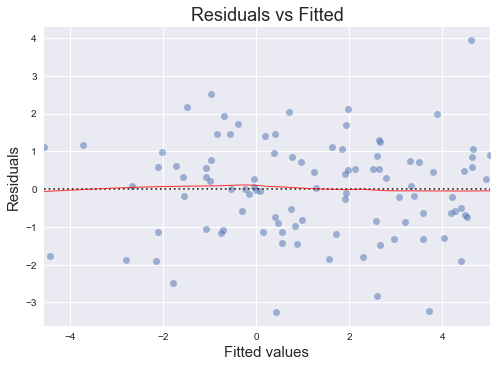

In [59]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


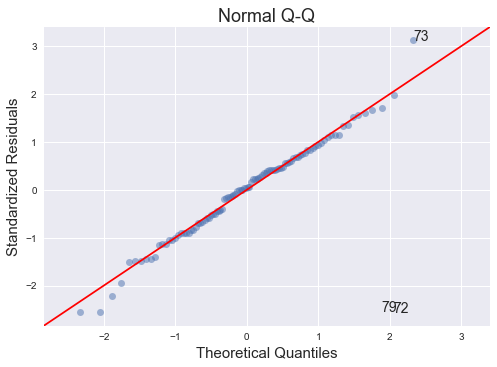

In [60]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

c:\users\nurma\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


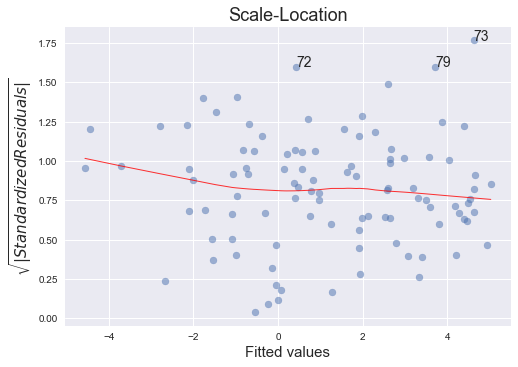

In [61]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]));

<h2>NORM</h2>

In [62]:
stats.jarque_bera(model_residuals)

Jarque_beraResult(statistic=0.4579683947673422, pvalue=0.7953411018760707)

In [63]:
import statsmodels.stats

<h2>NO CORRELATION</h2>

In [64]:
statsmodels.stats.diagnostic.acorr_breusch_godfrey(model_fit, nlags=12)

(15.101888072867952,
 0.23591172166262833,
 1.27482455615088,
 0.24824878052747634)

<h2>HOMO</h2>

In [65]:
statsmodels.stats.diagnostic.het_breuschpagan(model_fit.resid, model_fit.model.exog)

(0.01287022896597767,
 0.9096761545776523,
 0.012614447894987718,
 0.9108041295900664)

(<matplotlib.collections.PathCollection at 0x29f42a3f1f0>,
 <matplotlib.collections.PathCollection at 0x29f7d08fb20>)

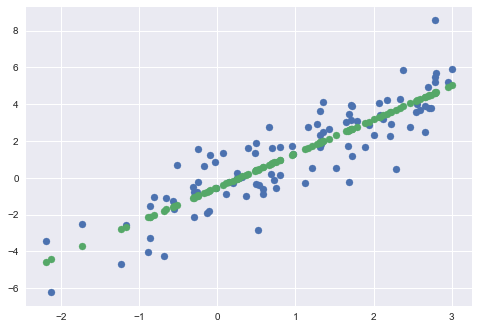

In [66]:
plt.scatter(x, y), plt.scatter(x, model_fitted_y)

In [67]:
lmbds

      fun: 161.00029506072482
 hess_inv: array([[0.00348625, 0.00087245],
       [0.00087245, 0.00067501]])
      jac: array([0.00000000e+00, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([0.23297654, 0.02797339])